**Classification**

In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data.

Example:- classify if it is spam or not.
Given a handwritten character, classify it as one of the known characters.



# **Predicting if a person would buy life insurance based on his age using logistic regression**


Below is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

### Importing necessary modules

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Gathering dataset

In [ ]:
url='https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv'
df=pd.read_csv(url)
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


### Data Visualization

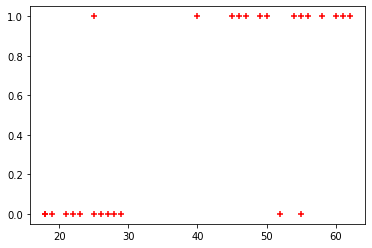

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

### Splitting dataset into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [ ]:
X_train

,age
17,58
24,50
0,22
8,62
3,52
22,40
25,54
18,19
12,27
20,21


In [ ]:
X_test

,age
13,29
7,60
11,28
6,55
14,49
15,55


### Let's try predicting with our linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
mod = LinearRegression()

In [ ]:
mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
mod.predict(X_test)

array([0.3046875 , 1.07161458, 0.27994792, 0.94791667, 0.79947917,
       0.94791667])

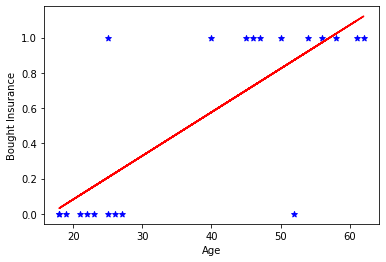

In [ ]:
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.scatter(X_train,y_train,color='Blue',marker='*')
plt.plot(X_train,mod.predict(X_train),color='Red')
plt.show()

In [ ]:
mod.score(X_test,y_test)

0.25479917173032407

**Now we will be using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
X_test

,age
13,29
7,60
11,28
6,55
14,49
15,55


In [ ]:
X_train

,age
17,58
24,50
0,22
8,62
3,52
22,40
25,54
18,19
12,27
20,21


In [ ]:
y_train

17    1
24    1
0     0
8     1
3     0
22    1
25    1
18    0
12    0
20    0
4     1
9     1
1     0
26    0
2     1
21    0
10    0
16    1
19    0
5     1
23    1
Name: bought_insurance, dtype: int64

In [ ]:
y_test

13    0
7     1
11    0
6     0
14    1
15    1
Name: bought_insurance, dtype: int64

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 0, 1, 1, 1])

In [ ]:
model.predict_proba(X_test)

array([[0.7429934 , 0.2570066 ],
       [0.02267687, 0.97732313],
       [0.77157614, 0.22842386],
       [0.0480973 , 0.9519027 ],
       [0.11391557, 0.88608443],
       [0.0480973 , 0.9519027 ]])

In [ ]:
y_predicted

array([0, 1, 0, 1, 1, 1])

In [ ]:
model.score(X_test,y_test)

0.8333333333333334

**Lets defined sigmoid function now and do the math with hand**

The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice. The function is differentiable.

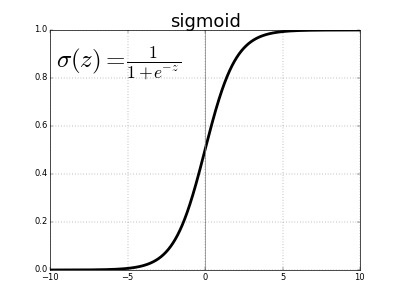

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
model.coef_

array([[0.15564701]])

In [ ]:
model.intercept_

array([-5.57534856])

In [ ]:
def prediction_function(age):
    z = 0.16 * age - 5.58 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [ ]:
age = 20
prediction_function(age)

0.08471056573073579

In [ ]:
age = 43
prediction_function(age)

0.7858349830425586